**Installing Python Shapefile Library (PyShp)**

The library pyshp provides read and write support for the Esri Shapefile format. The Shapefile format is a popular Geographic Information System vector data format created by Esri.

In [1]:
pip install pyshp

In [2]:
## import libraries

import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## visualization set

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

%matplotlib inline

We upload the geographical information from Queretaro State. To access the information, we use the key 22. All the information can be download from the following link:

## https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825218898


In [4]:
df_municipios = pd.read_csv("municipios.csv", header = 1, encoding='latin-1')
df_municipios

,Cve_Ent,Nombre_Entidad,Cve_Municipio,Nombre_Municipio
0,1,Aguascalientes,1,Aguascalientes
1,1,Aguascalientes,2,Asientos
2,1,Aguascalientes,3,Calvillo
3,1,Aguascalientes,4,Cosío
4,1,Aguascalientes,5,Jesús María
...,...,...,...,...
2453,32,Zacatecas,54,Villa Hidalgo
2454,32,Zacatecas,55,Villanueva
2455,32,Zacatecas,56,Zacatecas
2456,32,Zacatecas,57,Trancoso


In [5]:
# Reading the CSV file using 'latin-1' encoding
df_localities = pd.read_csv("localidades urbanas y rurales amanzanadas.csv", header = 1, encoding='latin-1')
df_localities

,ENTIDAD,MUNICIPIO,LOCALIDAD,NOMBRE DE LOCALIDAD,ÁMBITO,Plano/ Croquis,Referencia
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,Aguascalientes,U,S,S=Plano
2,1.0,1.0,106.0,Arellano,R,S,C=Croquis
3,1.0,1.0,114.0,Residencial San Nicolás [Baños la Cantera],R,S,NaN
4,1.0,1.0,120.0,Buenavista de Peñuelas,R,S,U=Urbano
...,...,...,...,...,...,...,...
55379,32.0,58.0,1.0,Santa María de la Paz,U,S,NaN
55380,32.0,58.0,6.0,Colonia Santa María,R,S,NaN
55381,32.0,58.0,17.0,El Soto,R,S,NaN
55382,32.0,58.0,35.0,Los Trigos (Mesa de los Trigos),R,C,NaN


In [13]:
## shp file for Queretaro
## https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825218898
## Extention "a" refers to "Area Geoestadistica Basica"
shp_path = "22a.shp"
sf = shp.Reader(shp_path)
## include also the file "22a.dbf"

From this file, we can access the geostatistical information,

In [15]:
def read_shapefile(sf):
    """
    Read a shp file and create a Pandas dataframe with a 'coords'
    column holding the geometry information.
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

and record the information in a Pandas DataFrame

In [16]:
df = read_shapefile(sf)
df

,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,coords
0,22,007,0003,0099,"[(2713862.7091000006, 971942.1466000006), (271..."
1,22,007,0001,0050,"[(2718914.0952999964, 963382.1376000047), (271..."
2,22,014,0001,1782,"[(2663260.026000008, 955784.3602000028), (2663..."
3,22,014,0001,2761,"[(2658738.6674000174, 960294.0475000031), (265..."
4,22,014,0001,2916,"[(2668193.1916000023, 959571.3047000058), (266..."
...,...,...,...,...,...
644,22,012,0001,0309,"[(2692769.599399999, 945695.1774999984), (2692..."
645,22,012,0001,0313,"[(2692995.0635000095, 944481.3039000034), (269..."
646,22,012,0001,0154,"[(2694086.120700009, 945088.8623000011), (2694..."
647,22,012,0029,0192,"[(2685698.841899991, 946184.8464000076), (2685..."


The DataFrame contains 649 records, with 5 columns of information (Entidad, Municipio, Localidad, ..., Coordenadas del poligono). We can access the administrative information using the method "records". For instance,

In [ ]:
sf.records()[1]

Record #1: ['22', '007', '0001', '0050']

To determine the name of the municipality and locality, we will use the following function:

In [26]:
def read_info_shape(sf,record):
    """
    Read a shp. The number "record" corresponds to the record in the file.
    The code determines "Municipio" and "Localidad" from the record.
    """
    ent_id, muni_id, loca_id, _  = sf.records()[record]
    MunicipiosQueretaro = df_municipios[df_municipios["Cve_Ent"]==float(ent_id)]
    muni_name = MunicipiosQueretaro[MunicipiosQueretaro["Cve_Municipio"]==float(muni_id)]["Nombre_Municipio"]
    muni_name = np.array(muni_name)[0]
    print("Municipio: ", muni_name)
    InfoEstadoQueretaro = df_localities[df_localities["ENTIDAD"]==float(ent_id)]
    InfoMuni = InfoEstadoQueretaro[InfoEstadoQueretaro["MUNICIPIO"]==float(muni_id)]
    loca_name = InfoMuni[InfoMuni["LOCALIDAD"]==float(loca_id)]["NOMBRE DE LOCALIDAD"]
    loca_name = np.array(loca_name)[0]
    print("Localidad: ", loca_name)
    return muni_name, loca_name

Let's explore one of the records

In [27]:
read_info_shape(sf,1)

Municipio:  Ezequiel Montes
Localidad:  Ezequiel Montes


('Ezequiel Montes', 'Ezequiel Montes')

With the following function, we will plot a map for an specific "Localidad".

In [23]:
def plot_shape(id):
    """ Plots a single shape, id is the number of the record """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat)
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    muni_name, local_name = read_info_shape(sf,id)
    plt.text(x0, y0, local_name, fontsize=10)
    plt.title("Municipio: " + muni_name)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

Municipio:  Querétaro
Localidad:  Santiago de Querétaro


(2662855.3142483947, 955958.1979451632)

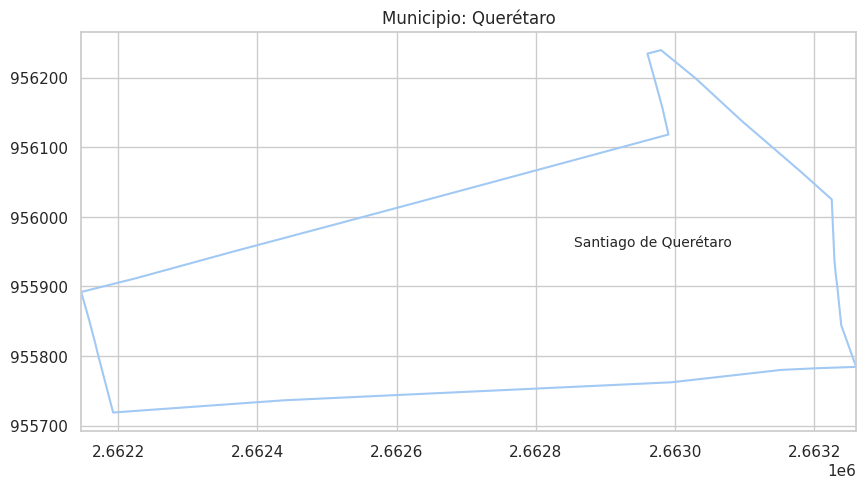

In [25]:
plot_shape(2)